# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view



---





*   Let $ A\in ℜ^{k\times l},\ X\in ℜ^{l\times m},\ B\in ℜ^{m\times n}$, then $(AXB)_{ij} = \sum_{p=1}^{l}a_{ip}(\sum_{t=1}^mx_{pt}b_{tj}) = \sum_{t=1}^mb_{tj}(\sum_{p=1}^la_{ip}x_{pt}) = b_{1j}(a_{i1}x_{11} + a_{i2}x_{21} +...+a_{il}x_{l1}) + b_{2j}(a_{i1}x_{12} + a_{i2}x_{22} +...+a_{il}x_{l2}) + ... + b_{mj}(a_{i1}x_{1m} + a_{i2}x_{2m} +...+a_{il}x_{lm}) = \begin{bmatrix} b_{1j}a_{i1} \  b_{1j}a_{i2} \ ... \  b_{1j}a_{il} \  b_{2j}a_{i1} \ ... \  b_{mj}a_{il} \end{bmatrix}\begin{bmatrix}
x_{11} \\
x_{21} \\
... \\
x_{l1} \\
x_{12} \\
... \\
x_{lm}
\end{bmatrix} = \begin{bmatrix} b_{1j} A_i \  b_{2j}A_i \ ... \  b_{mj}A_i \end{bmatrix}\mathrm{vec}(X)$

where $A_i-i'th$ row of $A$. We know that shape of $ABC$ is $k\times n$. So

$$\mathrm{vec}(ABC) = \begin{bmatrix}
\begin{bmatrix} b_{11} A_1 \  b_{21}A_1 \ ... \  b_{m1}A_1 \end{bmatrix}\mathrm{vec}(X) \\
\begin{bmatrix} b_{11} A_2 \  b_{21}A_2 \ ... \  b_{m1}A_2 \end{bmatrix}\mathrm{vec}(X) \\
... \\
\begin{bmatrix} b_{11} A_k \  b_{21}A_k \ ... \  b_{m1}A_k \end{bmatrix}\mathrm{vec}(X) \\
\begin{bmatrix} b_{12} A_1 \  b_{22}A_1 \ ... \  b_{m2}A_1 \end{bmatrix}\mathrm{vec}(X) \\
... \\
\begin{bmatrix} b_{1n} A_k \  b_{2n}A_k \ ... \  b_{mn}A_k \end{bmatrix}\mathrm{vec}(X)
\end{bmatrix} = \begin{bmatrix}
b_{11} A_1 \  b_{21}A_1 \ ... \  b_{m1}A_1  \\
 b_{11} A_2 \  b_{21}A_2 \ ... \  b_{m1}A_2  \\
... \\
 b_{11} A_k \  b_{21}A_k \ ... \  b_{m1}A_k \\
 b_{12} A_1 \  b_{22}A_1 \ ... \  b_{m2}A_1  \\
... \\
 b_{1n} A_k \  b_{2n}A_k \ ... \  b_{mn}A_k 
\end{bmatrix} \mathrm{vec}(X) =  \begin{bmatrix}
b_{11} A \  b_{21}A \ ... \  b_{m1}A  \\
 b_{12} A \  b_{22}A \ ... \  b_{m2}A  \\
... \\
 b_{1n} A \  b_{2n}A \ ... \  b_{mn}A
\end{bmatrix} \mathrm{vec}(X) = (B^\top \otimes A)\, \mathrm{vec}(X)$$

**In columnwise** reshape we will obtain $(AXB)_{ij} = \sum_{p=1}^{l}a_{ip}(\sum_{t=1}^mx_{pt}b_{tj}) = \sum_{t=1}^mb_{tj}(\sum_{p=1}^la_{ip}x_{pt}) = b_{1j}(a_{i1}x_{11} + a_{i2}x_{21} +...+a_{il}x_{l1}) + b_{2j}(a_{i1}x_{12} + a_{i2}x_{22} +...+a_{il}x_{l2}) + ... + b_{mj}(a_{i1}x_{1m} + a_{i2}x_{2m} +...+a_{il}x_{lm}) = \begin{bmatrix} x_{11} \  x_{12} \ ... \ x_{1m} \  x_{21} \ ... \  x_{lm} \end{bmatrix}\begin{bmatrix}
b_{1j}a_{i1} \\
b_{2j}a_{i1} \\
... \\
b_{mj}a_{i1} \\
b_{1j}a_{i2} \\
... \\
b_{mj}a_{il}
\end{bmatrix} = \mathrm{vec'}(X) \begin{bmatrix}
B^{j}a_{i1} \\
B^{j}a_{i2} \\
... \\
B^{j}a_{il}
\end{bmatrix}$

where $B^j-j'th$ column of $B$. So

$\mathrm{vec'}(ABC) = \begin{bmatrix}
\mathrm{vec'}(X) \begin{bmatrix}
B^{1}a_{11} \\
B^{1}a_{12} \\
... \\
B^{1}a_{1l}
\end{bmatrix} \
\mathrm{vec'}(X) \begin{bmatrix}
B^{2}a_{11} \\
B^{2}a_{12} \\
... \\
B^{2}a_{1l}
\end{bmatrix} \
... \
\mathrm{vec'}(X) \begin{bmatrix}
B^{n}a_{11} \\
B^{n}a_{12} \\
... \\
B^{n}a_{1l}
\end{bmatrix} \
\mathrm{vec'}(X) \begin{bmatrix}
B^{1}a_{21} \\
B^{1}a_{22} \\
... \\
B^{1}a_{2l}
\end{bmatrix} \
... \ 
\mathrm{vec'}(X) \begin{bmatrix}
B^{n}a_{k1} \\
B^{n}a_{k2} \\
... \\
B^{n}a_{kl}
\end{bmatrix} \
\end{bmatrix} = \mathrm{vec'}(X) \begin{bmatrix}
 B a_{11} \ B a_{21} \ ... \ B a_{k1} \\
 B a_{12} \ B a_{22} \ ... \ B a_{k2} \\
... \\
 B a_{1l} \ B a_{2l} \ ... \ B a_{kl} \\
\end{bmatrix} = \mathrm{vec'}(X) (A^\top \otimes B)$
*   Naively we should do $a_{ij}B-mn$ multiplications $kl$ times (assume dimensions from previous point) and when obtain a matrix of dimension $km \times nl$ do a multiplication with vector $x$ which requires $kmnl$ multiplications. So overall $2mnkl\ = \ O(mnkl)$. We can reduce it to by using formula above as $\mathrm{vec}(BXA^T) = (A \otimes B) \mathrm{vec}(X)$. Here we will need $mnl + mlk = ml(n+k)$ multiplications. 



*   $Ax = λ_Ax,\ By = λ_By$ where $x,\ y -$ eigenvectors if $A,\ B$ respectively, $λ_A,\ λ_B - $ corresponding eigenvalues. $(A\otimes I + I \otimes B)(x \otimes y) = Ax \otimes y + x \otimes By = λ_A x \otimes y + x \otimes λ_B y = (λ_A + λ_B)(x \otimes y )$. Since that eigenvalues of $A\otimes I + I \otimes B$ are $n^2$ elements of kind $\lambda_A^i + \lambda_B^j,\ i,j\in [1,\ n]$ and eigenvectors are $x^i \otimes y^j $ respectively.
* * Richardson: $λ_{min} = \frac{1}{1000},\ \lambda_{max} = 1000 \Rightarrow q = \frac{10^6 -1}{10^6 + 1}.\ \frac{\| e_k \|} {\| e_0 \|} \le q^k = 10^{-4} \Rightarrow k \approx 4`605`171$

  * Chebyshev: $q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1} = \frac{10^3 - 1}{10^3 + 1}.\  \frac{\| e_k \|} {\| e_0 \|} \le Cq^k = 10^{-4},\ C=2 \Rightarrow k \approx 4952$

  * CG: $\frac{\| e_k \|} {\| e_0 \|} \le γ \big(\frac{\sqrt{cond(A)}-1}{\sqrt{cond(A)}+1}\big)^k,\ γ=2 \Rightarrow k \approx 4952$

In [42]:
import numpy as np

A = np.zeros((1001, 1001), dtype=np.float32)
for i in range(999):
  A[i, i] = (i + 1) / 1000.0
A[999, 999] = 1
A[1000, 1000] = 1000

def f():
  return np.array([(i + 1) / 1000.0 for i in range(999)] + [1, 1000])

x_0 = np.zeros(1001, dtype=np.float32)
x_s = np.linalg.inv(A) @ f()
tau = 2 / (1000 + 1 / 1000.0)

rel_errors = []

def Richardson(x_0, A, f):
  iter_cnt = 1
  x_k = x_0
  x = x_k - tau * (A @ x_k - f())
  while np.linalg.norm(x - x_s) / np.linalg.norm(x) > 1e-4:
    err = np.linalg.norm(x - x_s) / np.linalg.norm(x)
    rel_errors.append(err)
    x_k = x
    x = x_k - tau * (A @ x_k - f())
    iter_cnt += 1
  
  return iter_cnt


In [43]:
%time Richardson(x_0, A, f)

CPU times: user 1h 54min 34s, sys: 1h 17min 49s, total: 3h 12min 23s
Wall time: 1h 37min 52s


3051263

Practically $3051263 < 4605171$. Good? Good.

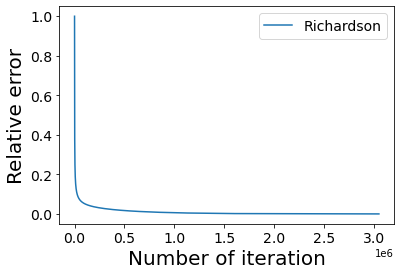

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rel_errors, label='Richardson')
plt.legend(fontsize=14)
plt.xlabel("Number of iteration", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
lam_max = 1000.0
lam_min = 1 / 1000.0

niters = int(2e4)
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
rhs = f()
x = np.zeros(1001)
r = A.dot(x) - rhs
rel_cheb = []
eps = 1e-4

def shuffle(idx):
  if len(idx) == 1:
    return idx
  else:
    l = len(idx) // 2 + len(idx) % 2
    new_idx = shuffle(idx[:l])
    perm = []
    count = 0
    for i in new_idx:
      perm.append(i)
      count += 1
      if count == len(idx):
        break
      perm.append(len(idx) + 1 - i)
      count += 1
      if count == len(idx):
        break
  return perm

good_perm = shuffle([i for i in range(1, niters+1)])

for i in range(niters):
    x = x - 1.0 / taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    rel_cheb.append(np.linalg.norm(x - x_s) / np.linalg.norm(x))
    if rel_cheb[-1] <= eps:
        print(f'number of iterations: {len(rel_cheb)}')
        break

number of iterations: 5602


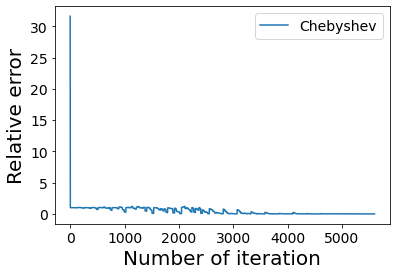

In [22]:
plt.plot(rel_cheb, label='Chebyshev')
plt.legend(fontsize=14)
plt.xlabel("Number of iteration", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [44]:
rel_cg = []
x = np.zeros(1001)

def CG(A, x, rhs, eps):
  r = rhs - A @ x
  err = r.T @ r
  i, p = 0, r
  while True:
    Ap = A @ p
    pAp = p.T @ Ap
    alpha = err / pAp
    x = x + alpha * p
    r = r - alpha * Ap
    new_err = r.T @ r
    beta = new_err / err
    abs_err = np.sum((A @ (x - x_s)) * (x - x_s)) ** 0.5
    mat_norm = np.sum((A @ x) * x) ** 0.5
    rel_cg.append(abs_err / mat_norm)
    p = r + beta * p
    err = new_err
    i += 1
    if rel_cg[-1] < eps:
      return


CG(A, x, f(), 1e-4)

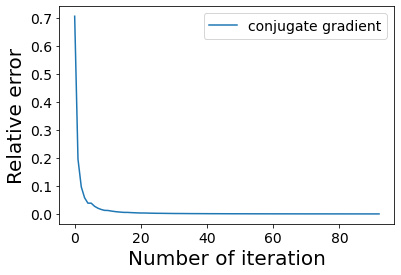

In [45]:
plt.plot(rel_cg, label='conjugate gradient')
plt.legend(fontsize=14)
plt.xlabel("Number of iteration", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This is much less than expected. Good? Good.

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

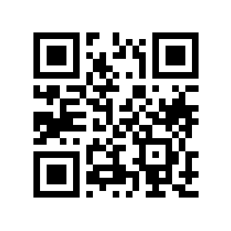

In [72]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [73]:
import numpy as np
from scipy import linalg
from scipy.sparse.linalg import LinearOperator
from scipy.linalg import toeplitz

In [74]:
def toeplitz_check(x, alpha):
  """
  Stores all full toeplitz matrices
  doesn't use fft
  *only for check*
  """
  T = []
  n = int(len(x) ** 0.5)
  for i in range(n):
    c = [alpha / np.pi * np.exp(-alpha * (i**2 + j**2)) for j in range(n)]
    Ti = toeplitz(c)
    T.append(np.array([list(t) for t in Ti]).reshape(n,n))
  bt = T[0]
  for j in range(1,n):
    bt = np.hstack((bt, T[abs(j)]))
  bttb = bt
  for i in range(1,n):
    bt = T[i]
    for j in range(1,n):
      bt = np.hstack((bt, T[abs(i-j)]))
    bttb = np.vstack((bttb, bt))
  return np.dot(bttb, x)

In [75]:
def T_matvec(x, alpha):
    """
    I didn't use fft here
    because as I will show below T = T_block x T_block (tensor multiplication)
    so I'd prefered to use property from task above: (T x T)vec(X) = vec(TXT)
    it stores T_block but works pretty fast
    """
    n = int(len(x) ** 0.5)
    col = [np.exp(- alpha * (j)**2) for j in range(n)]
    Ti = toeplitz(col)
    x_mat = np.array(x).reshape(n, n).T
    return ((Ti @ x_mat) @ Ti).T.ravel() * alpha / np.pi

def T_matvec_fft(x, alpha):
    """
    With fft but works slower than method above
    """
    n = int(len(x) ** 0.5)
    c = [alpha / np.pi * np.exp(- alpha * (j)**2) for j in range(n)]
    t = np.hstack((c, c[::-1][:-1]))
    for i in range(1, n):
      c = [alpha / np.pi * np.exp(- alpha * ((i)**2 + (j)**2)) for j in range(n)]
      t1 = np.hstack((c, c[::-1][:-1]))
      t = np.vstack((t, t1))
    if n == 1:
      x_mat = np.array(x).reshape(n, n).T
      pad = np.zeros((2*n-1, 2*n-1), dtype=complex)
      pad[:n, :n] = x_mat
      return (np.fft.ifftn(np.fft.fftn(t.T) * np.fft.fftn(pad))[:n, :n]).ravel()
    t = np.vstack((t, t[:-n:-1]))
    x_mat = np.array(x).reshape(n, n).T
    pad = np.zeros((2*n-1, 2*n-1), dtype=complex)
    pad[:n, :n] = x_mat
    return (np.fft.ifft2(np.fft.fft2(t.T) * np.fft.fft2(pad))[:n, :n]).ravel()

# testing
alpha = 0.01
x_t = np.ones(400).astype(float)

T = LinearOperator((len(x_t), len(x_t)), matvec = lambda x: T_matvec(x, alpha=alpha))
y = T.matvec(x_t)
assert np.allclose(y, toeplitz_check(x_t, alpha))

T = LinearOperator((len(x_t), len(x_t)), matvec = lambda x: T_matvec_fft(x, alpha=alpha))
y = T.matvec(x_t)
assert np.allclose(y, toeplitz_check(x_t, alpha))

In [76]:
x = x.T.ravel().astype(float)
T = LinearOperator((len(x), len(x)), matvec = lambda x: T_matvec(x, alpha=alpha))
y = T.matvec(x)

#assert np.allclose(y, toeplitz_check(x, alpha))  #better not to uncomment

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**



---



Our blocks can be interpreted as $
\frac{\alpha}{\pi} e^{-α i^2} \begin{bmatrix}  e^{0} &  e^{-α} & ... &  e^{-α (n-1)^2}  \\ 
e^{-α} &  e^{0} & ... &  e^{-α (n-1)^2} \\
 ... \\ 
e^{-α(n-1)^2} &  e^{-α(n-2)^2} & ... &  e^{0}
  \end{bmatrix} = \frac{\alpha}{\pi} e^{-α i^2} T_{block}\ $ where $i \in [0,\ n-1]$

Since that $T = \begin{bmatrix}  \frac{\alpha}{\pi} e^{0}T_{block} &  \frac{\alpha}{\pi} e^{-α}T_{block} & ... & \frac{\alpha}{\pi} e^{-α(n-1)^2}T_{block}\\ 
\frac{\alpha}{\pi} e^{-α}T_{block} &  \frac{\alpha}{\pi} e^{0}T_{block} & ... & \frac{\alpha}{\pi} e^{-α(n-2)^2}T_{block}\\ 
 ... \\ 
\frac{\alpha}{\pi} e^{-α(n-1)^2}T_{block} &  \frac{\alpha}{\pi} e^{-α(n-2)^2}T_{block} & ... & \frac{\alpha}{\pi} e^{0}T_{block}\\ 
  \end{bmatrix} = \frac{α}{\pi} (T_{block} \otimes T_{block})$

Eigenvalues of $T$ will be $λ_i\cdotλ_j,\ i,j \in [1,n]-$ eigenvalues of $T_{block}$. Since $α > 0$ for $T$ being positive definite it's enough that $T_{block}$ is positive definite. And that is so, because $T_{block}$ is Gram matrix for [RBF](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) with $γ=α\ \Rightarrow λ_i > 0$ for all $1 \le i \le n$.

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [77]:
from scipy.sparse.linalg import cg 

class Counter:
  def __init__(self, rhs=None, A=None):
    self.niter = 0
    self.rhs = rhs
    self.A = A
  def __call__(self, *args):
    self.niter += 1
    if self.rhs is not None and self.A is not None:
      print(np.linalg.norm(self.rhs - self.A @ args[0]))

In [78]:
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
from itertools import product
import scipy as sp

In [79]:
def calc(arg):
  alpha, tol, x = arg
  counter = Counter()
  x_0 = np.copy(x)
  T = LinearOperator((len(x_0), len(x_0)), matvec = lambda x: T_matvec(x, alpha=alpha))
  y = T.matvec(x_0)
  res, _ = cg(T, y, tol=tol, callback=counter)
  return counter.niter, np.linalg.norm(res - x_0) / np.linalg.norm(res)

In [ ]:
alphas = [0.1, 0.01, 0.001]
tols = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]

results = Parallel(n_jobs=-1, verbose=51, backend="threading")(
    map(delayed(calc), ((a, t, x) for a, t in list(product(alphas, tols)))))

alpha | tol | num_iters | relative_error
--- | --- | --- | --- 
0.1 | 0.001 | 11 | 0.1297
0.1 | 0.0001 | 46 | 0.1025
0.1 | 0.00001 | 136 | 0.0963 
0.1 | 0.000001 | 792 | 0.0724
0.1 | 0.0000001 | 2409 | 0.0669
0.01 | 0.001 | 18 | 0.2209
0.01 | 0.0001 | 53 | 0.2063
0.01 | 0.00001 | 168 | 0.2018
0.01 | 0.000001 | 541 | 0.1988
0.01 | 0.0000001 | 2393 | 0.1934
0.001 | 0.001 | 13 | 0.4861
0.001 | 0.0001 | 49 | 0.4641
0.001 | 0.00001 | 170 | 0.4364
0.001 | 0.000001 | 492 | 0.4129
0.001 | 0.0000001 | 1462 | 0.3985

In [80]:
c = [0.1 / np.pi * np.exp(-0.1 * (j**2)) for j in range(n)]
T_block = toeplitz(c)
eigenvalues = np.linalg.eig(T_block)[0]
cond  = max(eigenvalues) / min(eigenvalues)
print(f"cond for T with alpha = 0.1: {cond**2}")

cond for T with alpha = 0.1: 6.59051020872641e+20


In [81]:
c = [0.01 / np.pi * np.exp(-0.01 * (j**2)) for j in range(n)]
T_block = toeplitz(c)
eigenvalues = np.linalg.eig(T_block)[0]
cond  = max(eigenvalues) / min(eigenvalues)
print(f"cond for T with alpha = 0.01: {cond**2}")

cond for T with alpha = 0.01: (4.4608001000808876e+32+0j)


In [82]:
c = [0.001 / np.pi * np.exp(-0.001 * (j**2)) for j in range(n)]
T_block = toeplitz(c)
eigenvalues = np.linalg.eig(T_block)[0]
cond  = max(eigenvalues) / min(eigenvalues)
print(f"cond for T with alpha = 0.001: {cond**2}")

cond for T with alpha = 0.001: (7.831962040821843e+32+0j)


As you can see the condition value of T is very large $\Rightarrow$ convergence rate is very low and CG doesn't converge to zero. With decreasing of $\alpha$ the condition value increases, hence CG converges very bad. 



In [83]:
np.random.seed(131)
alpha = 0.01

T = LinearOperator((len(x), len(x)), matvec = lambda x: T_matvec(x, alpha=alpha))
y = T.matvec(x)
y_hat = y + np.random.randn(y.shape[0])

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?



---



*  Here I added output of $\|y_{hat} - T x\|$. It is **increasing** and it indicates that 
process doesn't converge.

In [11]:
counter = Counter(y_hat, T)
res, _ = cg(T, y_hat, tol=1e-5, callback=counter)

5815.995781996277
2846.244538987975
1479.333597206563
1134.7126820698102
916.035192028253
733.4760390828067
780.7037538048105
942.2911457131352
1139.7114470835902
1530.8859075879293
1857.8854988820262
2256.8134513217597
2676.9047590294567
3202.0675261451893
3928.2178344847766
4261.360736114586
5863.465853423601
6566.534888981842
6954.145648134103
8489.77614503523
8709.729414383293
10222.843536401528
11647.393616043386
11824.846822912943
12985.16304567143
13863.313336026029
14208.944444363453
15909.142936477168
16280.769658386713
15867.153946203625
15455.414967501243
15762.320200697499
17340.149388652197
19678.104964483362
20298.576165107224
18259.431922556214
18219.05325591632
18775.345602517955
20173.194569002793
20745.643529145767
20898.759125041874
18593.25107573901
19556.226354182894
21159.21636361656
20248.80997884583
21936.34970409643
20680.880742914007
21449.93413007697
22160.789312687528


KeyboardInterrupt: ignored

For example, here norm is decreasing and process converges.

In [91]:
counter = Counter(y, T)
res, _ = cg(T, y, tol=1e-5, callback=counter)

5806.984949239885
2817.9090386681555
1417.6799473823423
1011.3269182230987
718.394035838342
451.51616774537064
333.507063123509
265.35097363880703
207.44577844994808
184.92370364244582
155.3648614215143
132.13270903029743
110.52682660257416
93.69371729548219
83.44621100411854
65.2658952179827
66.77152041397726
59.258324783352
49.391399420676194
48.157541470576966
39.96332806972329
38.02497081546409
36.8329115173475
31.98057372962435
30.04749911926978
28.013508467137296
25.241101284195977
25.2058375915984
23.839839792759445
21.245434322950203
18.3896022556734
16.217011980993856
15.711989129960509
16.358287612186814
16.29329113651159
13.898854865368333
12.564086116682207
11.894635508268395
11.99542921617991
11.936329269821146
11.941015072243324
9.934575319562066
9.490709960857998
9.650334217869636
8.64933218635942
8.835910778543694
7.878116421351261
7.501238154596892
7.259418410596463
6.857978409017881
6.681866812573069
6.364230311668135
5.9514771431462075
5.936749585317415
5.73673153323

The process doesn't converge due to ill-condition of T (shown in the task above). In this case the solution is very sensitive to perturbations in the right hand side. To use CG we need to decrease relative difference between highest eigenvalue and lowest one a.k.a make condition value less. For this purpose we can use regularization. For example, Tikhonov (as below) which uses the fact that $\frac{a + λ_{max}}{a + λ_{min}} < \frac{λ_{max}}{λ_{min}}$. Or other regularization techniques. The disadvantage of Tikhonov regularization is that the regularization parameter must be selected by ourselves and a priori we don't know which one will be better in each specific problem.

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [86]:
def T_lmbda_matvec_check(x, alpha, lmbda):
  """
  Stores all full toeplitz matrices
  doesn't use fft
  *only for check*
  """
  T = []
  n = int(len(x) ** 0.5)
  for i in range(n):
    c = [alpha / np.pi * np.exp(-alpha * (i**2 + j**2)) for j in range(n)]
    Ti = toeplitz(c)
    T.append(np.array([list(t) for t in Ti]).reshape(n,n))
  bt = T[0]
  for j in range(1,n):
    bt = np.hstack((bt, T[abs(j)]))
  bttb = bt
  for i in range(1,n):
    bt = T[i]
    for j in range(1,n):
      bt = np.hstack((bt, T[abs(i-j)]))
    bttb = np.vstack((bttb, bt))
  bttb += np.eye(bttb.shape[0]) * lmbda**2
  return np.dot(bttb, x)


def T_lmbda_matvec_fft(x, alpha, lmbda):
    """
    In case of fft
    """
    n = int(len(x) ** 0.5)
    c = [alpha / np.pi * np.exp(- alpha * (j)**2) for j in range(n)]
    t = np.hstack((c, c[::-1][:-1]))
    for i in range(1, n):
      c = [alpha / np.pi * np.exp(- alpha * ((i)**2 + (j)**2)) for j in range(n)]
      t1 = np.hstack((c, c[::-1][:-1]))
      t = np.vstack((t, t1))
    if n == 1:
      x_mat = np.array(x).reshape(n, n).T
      pad = np.zeros((2*n-1, 2*n-1), dtype=complex)
      pad[:n, :n] = x_mat
      return (np.fft.ifftn(np.fft.fftn(t.T) * np.fft.fftn(pad))[:n, :n]).ravel()
    t = np.vstack((t, t[:-n:-1]))
    x_mat = np.array(x).reshape(n, n).T
    pad = np.zeros((2*n-1, 2*n-1), dtype=complex)
    pad[:n, :n] = x_mat
    return (np.fft.ifft2(np.fft.fft2(t.T) * np.fft.fft2(pad))[:n, :n]).ravel() + lmbda**2 * x



def T_lmbda_matvec(x, alpha, lmbda):
    n = int(len(x) ** 0.5)
    col = [np.exp(- alpha * (j)**2) for j in range(n)]
    Ti = toeplitz(col)
    x_mat = np.array(x).reshape(n, n).T
    without_reg = ((Ti @ x_mat) @ Ti).T.ravel() * alpha / np.pi
    return without_reg + lmbda**2 * x

# testing
lmbda = 10
alpha = 0.01
x_t = np.ones(400).astype(float)

T = LinearOperator((len(x_t), len(x_t)), matvec = lambda x: T_lmbda_matvec(x, alpha=alpha, lmbda=lmbda))
y = T.matvec(x_t)
assert np.allclose(y, T_lmbda_matvec_check(x_t, alpha, lmbda))

T = LinearOperator((len(x_t), len(x_t)), matvec = lambda x: T_lmbda_matvec_fft(x, alpha=alpha, lmbda=lmbda))
y = T.matvec(x_t)
assert np.allclose(y, T_lmbda_matvec_check(x_t, alpha, lmbda))

In [85]:
def new_calc(arg):
  lmbda, tol, x = arg
  counter = Counter()
  x_0 = np.copy(x)
  T = LinearOperator((len(x_0), len(x_0)), matvec = lambda x: T_lmbda_matvec(x, alpha=0.01, lmbda=lmbda))
  res, _ = cg(T, y_hat, tol=tol, callback=counter)
  return counter.niter, np.linalg.norm(res - x_0) / np.linalg.norm(res)

In [ ]:
lmbdas = [10, 1, 0.1]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

results = Parallel(n_jobs=-1, verbose=51, backend="threading")(
    map(delayed(new_calc), ((l, t, x) for l, t in list(product(lmbdas, tols)))))

lambda | tol | num_iters | relative_error
--- | --- | --- | --- 
10 | 0.001 | 1 | 118.0814
10 | 0.0001 | 2 | 118.0811
10 | 0.00001 | 2 | 118.0811
10 | 0.000001 | 3 | 118.0811
10 | 0.0000001 | 3 | 118.0811
1 | 0.001 | 4 | 1.4048
1 | 0.0001 | 5 | 1.4048
1 | 0.00001 | 6 | 1.4048
1 | 0.000001 | 8 | 1.4048
1 | 0.0000001 | 9 | 1.4048
0.1 | 0.001 | 19 | 0.4857
0.1 | 0.0001 | 28 | 0.4887
0.1 | 0.00001 | 38 | 0.4888
0.1 | 0.000001 | 50 | 0.4888
0.1 | 0.0000001 | 61 | 0.4888

With regularization CG began to converge and became more robust. Also the number of iterations in each case decrease because convergence rate is higher than for ill-conditioned problem. And, in comparing with the task 2, by taking $λ=0.1$ we obtain relative error close to one in the task 2 but after less number of iterations and on perturbated right hand side.

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [87]:
def C_inv_matvec(x, alpha, lmbda):
    n = int(len(x) ** 0.5)
    col = [np.exp(- alpha * (j)**2) for j in range(n)]
    Ti = toeplitz(col)
    c1 = sp.linalg.circulant(col)
    c1_inv = np.linalg.inv(c1)
    mat = c1_inv @ Ti
    x_mat = np.array(x).reshape(n, n).T
    without_reg = ((mat @ x_mat) @ mat).T.ravel() * alpha / np.pi
    return without_reg + c1_inv[0][0] * lmbda**2 * x

In [88]:
def one_more_new_calc(arg):
  tol, x = arg
  counter = Counter()
  x_0 = np.copy(x)
  T = LinearOperator((len(x_0), len(x_0)), matvec = lambda x: C_inv_matvec(x, alpha=0.01, lmbda=1))
  res, _ = cg(T, y_hat, tol=tol, callback=counter)
  return counter.niter, np.linalg.norm(res - x_0) / np.linalg.norm(res)

In [ ]:
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

results = Parallel(n_jobs=-1, verbose=51, backend="threading")(
    map(delayed(one_more_new_calc), ((t, x) for t in tols)))

lambda | tol | num_iters | relative_error | task 4 (num_iters, relative_error)
--- | --- | --- | --- | ---
1 | 0.001 | 2 | 0.4855 | 4 , 1.4048
1 | 0.0001 | 2 | 0.4855 | 5 , 1.4048
1 | 0.00001 | 3 | 0.4855 | 6 , 1.4048
1 | 0.000001 | 3 | 0.4855 | 8 , 1.4048
1 | 0.0000001 | 4 | 0.4855 | 9 , 1.4048

Number of iterations is approximately twice less than in the task 4 and relative error is less too.

In [108]:
c = [0.01 / np.pi * np.exp(-0.01 * (j**2)) for j in range(n)]
T_block = toeplitz(c)
T_block += np.eye(len(T_block)) * 1
eigenvalues = np.linalg.eig(T_block)[0]
cond  = max(eigenvalues) / min(eigenvalues)
print(f"cond for T + lambdaI with alpha = 0.01 and lambda = 1: {cond**2}")

cond for T + lambdaI with alpha = 0.01 and lambda = 1: (1.1157642570571829+0j)


In [107]:
c = [0.01 / np.pi * np.exp(-0.01 * (j**2)) for j in range(n)]
T_block = toeplitz(c)
c1 = sp.linalg.circulant(c)
c1_inv = np.linalg.inv(c1)
T_block = c1_inv @ T_block
T_block += np.eye(len(T_block)) * 1 * c1_inv[0][0]
eigenvalues = np.linalg.eig(T_block)[0]
cond  = max(eigenvalues) / min(eigenvalues)
print(f"cond for inv(C) @ (T + lambdaI) with alpha = 0.01 and lambda = 1: {cond**2}")

cond for inv(C) @ (T + lambdaI) with alpha = 0.01 and lambda = 1: (1.0072987272454452+0j)


Cond value is less which affects on convergence rate.